In [103]:
%matplotlib inline 
import matplotlib.pyplot as plt 

In [107]:
import pandas 
from sklearn import linear_model, pipeline, preprocessing, cross_validation, ensemble
from scipy.stats import pearsonr
from numpy import log10

scaler = preprocessing.RobustScaler()
df = pandas.read_csv( 'feature_sets/kcatkm.csv', index_col=0 ) 
y = log10( df.ix[:,-1:] ).as_matrix().ravel()
X = scaler.fit_transform( df.ix[:,:-1] )

#print df.corr()[['kcatkm']].sort_values('kcatkm').head(5)
#print df.corr()[['kcatkm']].sort_values('kcatkm').tail(5)

In [105]:
print X.shape 
print y.shape 

(78, 47)
(78,)


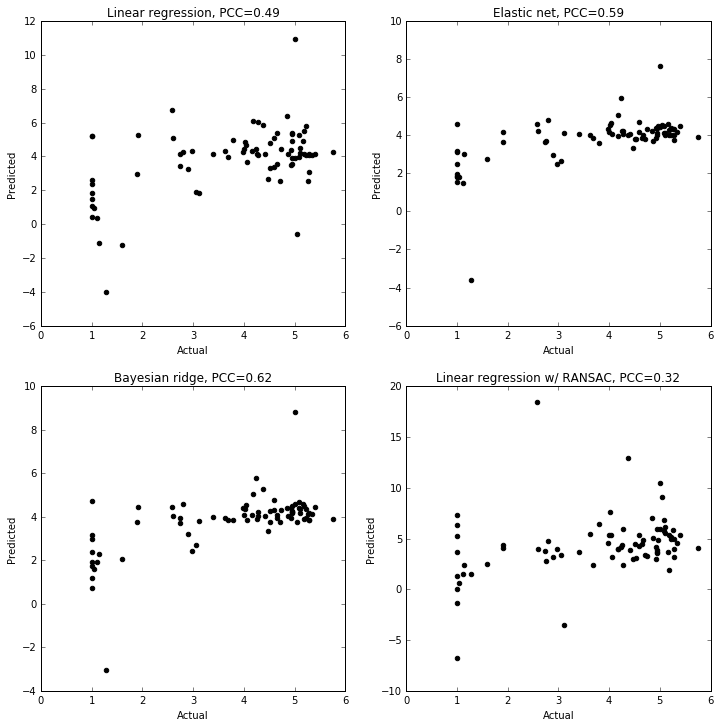

In [106]:
plt.figure( figsize=(12,12) )
lm = linear_model.LinearRegression()
preds = cross_validation.cross_val_predict( lm, X, y, cv=10 ) 
plt.subplot( 2, 2, 1 ) 
plt.scatter( y, preds, c='k' ) 
plt.title( 'Linear regression, PCC={0:2.2f}'.format( *pearsonr( y, preds ) ) ) 
plt.xlabel( 'Actual' ); plt.ylabel( 'Predicted' ) 

L = [ .3, .5, .7 ] 
lm = linear_model.ElasticNetCV(l1_ratio=L)
preds = cross_validation.cross_val_predict( lm, X, y, cv=10 ) 
plt.subplot( 2, 2, 2 ) 
plt.scatter( y, preds, c='k' ) 
plt.title( 'Elastic net, PCC={0:2.2f}'.format( *pearsonr( y, preds ) ) ) 
plt.xlabel( 'Actual' ); plt.ylabel( 'Predicted' ) 

L = [ .3, .5, .7 ] 
lm = linear_model.BayesianRidge()
preds = cross_validation.cross_val_predict( lm, X, y, cv=10 ) 
plt.subplot( 2, 2, 3 ) 
plt.scatter( y, preds, c='k' ) 
plt.title( 'Bayesian ridge, PCC={0:2.2f}'.format( *pearsonr( y, preds ) ) ) 
plt.xlabel( 'Actual' ); plt.ylabel( 'Predicted' ) 
#plt.tight_layout()

lm = linear_model.LinearRegression()
ran = linear_model.RANSACRegressor( lm ) 
preds = cross_validation.cross_val_predict( ran, X, y, cv=10 ) 
plt.subplot( 2, 2, 4 ) 
plt.scatter( y, preds, c='k' ) 
plt.title( 'Linear regression w/ RANSAC, PCC={0:2.2f}'.format( *pearsonr( y, preds ) ) ) 
plt.xlabel( 'Actual' ); plt.ylabel( 'Predicted' ) 

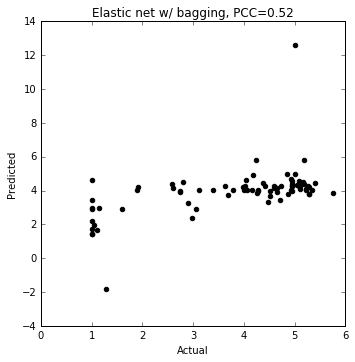

In [108]:
plt.figure( figsize=(12,12) )
L = [ .3, .5, .7 ] 
net = linear_model.ElasticNetCV(l1_ratio=L)
lm = ensemble.BaggingRegressor( net ) 
preds = cross_validation.cross_val_predict( lm, X, y, cv=10 ) 
plt.subplot( 2, 2, 1 ) 
plt.scatter( y, preds, c='k' ) 
plt.title( 'Elastic net w/ bagging, PCC={0:2.2f}'.format( *pearsonr( y, preds ) ) ) 
plt.xlabel( 'Actual' ); plt.ylabel( 'Predicted' ) 

# L = [ .3, .5, .7 ] 
# lm = linear_model.ElasticNetCV(l1_ratio=L)
# preds = cross_validation.cross_val_predict( lm, X, y, cv=10 ) 
# plt.subplot( 2, 2, 2 ) 
# plt.scatter( y, preds, c='k' ) 
# plt.title( 'Elastic net, PCC={0:2.2f}'.format( *pearsonr( y, preds ) ) ) 
# plt.xlabel( 'Actual' ); plt.ylabel( 'Predicted' ) 

# L = [ .3, .5, .7 ] 
# lm = linear_model.BayesianRidge()
# preds = cross_validation.cross_val_predict( lm, X, y, cv=10 ) 
# plt.subplot( 2, 2, 3 ) 
# plt.scatter( y, preds, c='k' ) 
# plt.title( 'Bayesian ridge, PCC={0:2.2f}'.format( *pearsonr( y, preds ) ) ) 
# plt.xlabel( 'Actual' ); plt.ylabel( 'Predicted' ) 
# #plt.tight_layout()

# lm = linear_model.LinearRegression()
# ran = linear_model.RANSACRegressor( lm ) 
# preds = cross_validation.cross_val_predict( ran, X, y, cv=10 ) 
# plt.subplot( 2, 2, 4 ) 
# plt.scatter( y, preds, c='k' ) 
# plt.title( 'Linear regression w/ RANSAC, PCC={0:2.2f}'.format( *pearsonr( y, preds ) ) ) 
# plt.xlabel( 'Actual' ); plt.ylabel( 'Predicted' ) 

In [ ]:
# from http://journals.plos.org/ploscompbiol/article?id=10.1371%2Fjournal.pcbi.1003592

# three types of classification 

# does the protein express or not? (0, 1) 

# does the mutation result in higher or lower Tm (0, 1) 

# does the mutation result in higher Tm or either of lower Tm and no expression 



def binarize( float_num ):
    if float_num > 0.